<a href="https://colab.research.google.com/github/sadoky/inteligencia-_articial_ELECT/blob/main/Softmax_SIgmoid_MAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PERCEPTRON_CON_CORRIMIENTO_LINEAL_3


**librerias**





In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd

* Lectura de datos 

In [ ]:
datoscop=pd.read_csv('https://raw.githubusercontent.com/sadoky/inteligencia-_articial_ELECT/main/data.csv')


* Seleccion de vectores x1,x2  y clasificacion 

In [ ]:
X1=datoscop["X"]      # vector de entrada X1
X2=datoscop["W"]      # vector de entrada X2

Y1=datoscop["b"]      # bandera  o vector de salida 

n=100                 # nuemro de datos a clasificar 

seleccion_1_1=[]      # vector que clasifica los datos x1=1                   
seleccion_1_2=[]      # vector que clasifica los datos x2=1
seleccion_0_1=[]      # vector que clasifica  los datos x1=0
seleccion_0_2=[]      # vector que clasifica los datos x2=0


for i in range (n):              # ciclo necesario para  la clasificacion de los puntos Y1=1 or Y1=0
  if Y1[i]==1:
    seleccion_1_1.append(X1[i])
    seleccion_1_2.append(X2[i])
  else:
    seleccion_0_1.append(X1[i])
    seleccion_0_2.append(X2[i])

**definicion_de_recta_clasificadora**

In [ ]:
def f(x):
  return 0.3-x                # recta clasificadora inicial 

 
x=np.arange(0,1,0.1)   
y= f(x)                       # fucion lineal inicial 


**Gráfica_con_valores_iniciales (pesos y bias iniciales)**

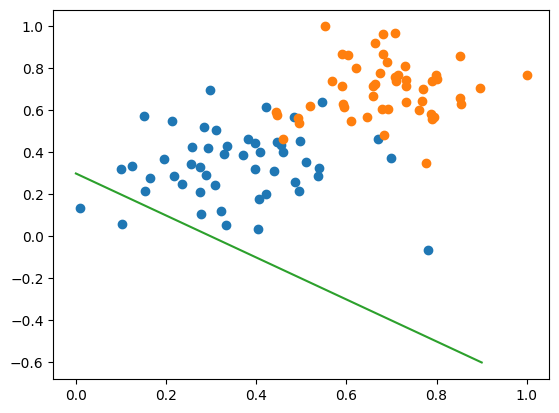

In [ ]:
fig, ax = plt.subplots()
plt.plot(seleccion_1_1,seleccion_1_2,'o')
plt.plot(seleccion_0_1,seleccion_0_2,'o')
ax.plot(x,y)

# entrenamiento_perceptron


In [ ]:
peso1=1
peso2=1
bias=-0.3       # definición de pesos y bias iniciales

alpha=0.003     # tasa de aprendizaje de el peso 1
betha=0.001     # tasa de aprendizaje del peso 2
gamma=0.002     # tasa de aprendizaje del peso 3




def clasificador(peso1,peso2,bias):
  return (-bias-(peso2*x))/peso1

solucion=[]                                         # perceptrón   

graph=[]                                            # vector de graficas por cada epoca 

for epocas in range(20):                            #  ciclo de epocas de entrenamiento 
  graph.append(clasificador(peso1,peso2,bias))      # se agrega una recta por cada epoca 

  for i in range(n):                                
   solucion=(X1[i]*peso1)+(X2[i]*peso2)+bias         
   if solucion <0:
    if Y1[i]==0:
       peso1=peso1+alpha
       peso2=peso2+gamma
       bias=bias+betha
   else:
     if Y1[i]==1:
       peso1=peso1-alpha
       peso2=peso2-gamma
       bias=bias-betha

**Funcion_graficadora_de_la _recta_clasificadora**


In [ ]:
x22=np.arange(0,1,0.1)

def clasificador(peso1,peso2,bias):    # función que permite graficar la recta clasificadora 
  return (-bias-(peso2*x22))/peso1

**Pesos_y_bias_finales**


In [ ]:
print(peso1)
print(peso2)
print(bias)

salida=clasificador(peso1,peso2,bias)

0.37899999999999945
0.5859999999999996
-0.5070000000000001


**GRAFICA_CON_VARIACION_DE_ÉPOCAS**

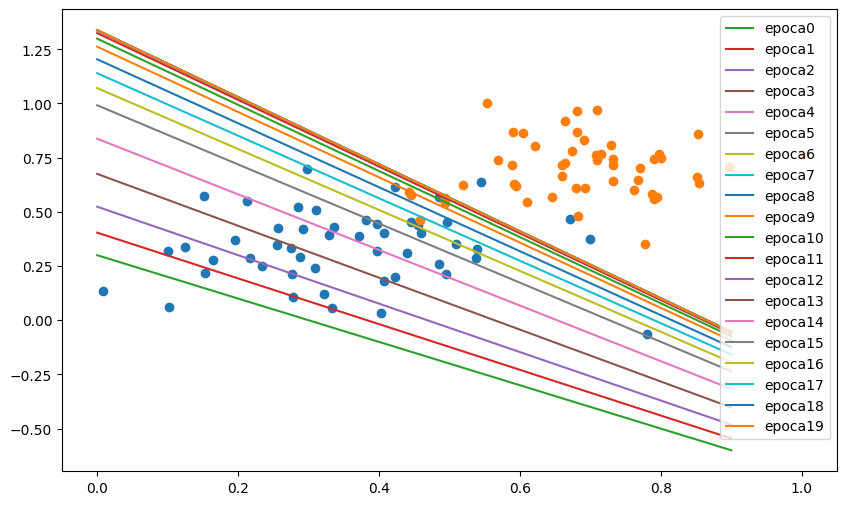

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(seleccion_1_1,seleccion_1_2,'o')             # valores iguales a uno
plt.plot(seleccion_0_1,seleccion_0_2,'o')             # valores iguales a cero   

for epocas in range(20):
  numero=str(epocas)
  

  plt.plot(x22,graph[epocas],label="epoca"+numero)    # se grafica cada una de las epocas de entrenamiento del perceptrón
  plt.legend(loc="upper right")


# Entorno_de _Clasificación


(0.0, 1.0)

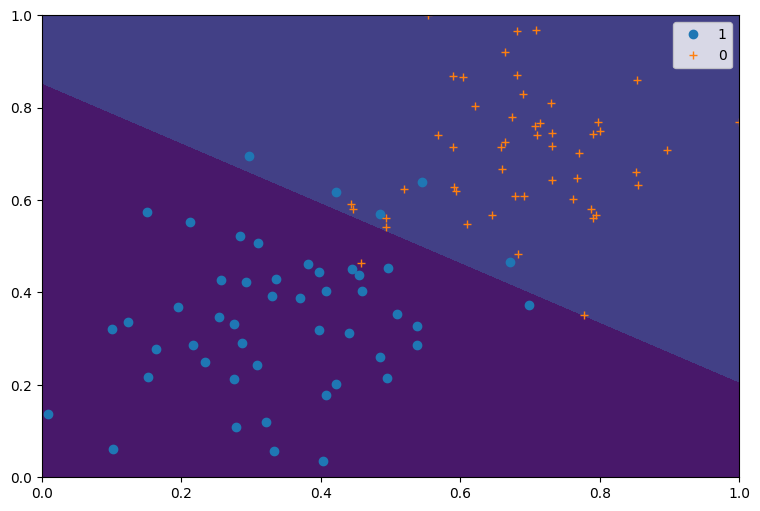

In [ ]:
x111=np.linspace(0,10,10)                              #vector entre 0 10 con 10 espacios entre si 
y111=np.linspace(0,10,10)
A,B=np.meshgrid(x111,y111)                             # malla necesaria para el contorno 


z=np.array((peso1*A)+(peso2*B)-0.5)                    # funcion lineal con base en la malla creada 
#print(z)

plt.figure(figsize=(9,6))
plt.plot(seleccion_1_1,seleccion_1_2,'o',label="1")
plt.plot(seleccion_0_1,seleccion_0_2,'+',label="0")
plt.legend()
plt.contourf(A, B, z)                                  # la funcion contourf permite generar mapas de contorno con las coordenadas que se le proporcionan 
plt.xlim([0,1])
plt.ylim([0,1])

# Elongación del entorno de clasificación 



In [ ]:
col=np.multiply(seleccion_1_1,3)
col2=np.multiply(seleccion_1_2,3)
col3=np.multiply(seleccion_0_1,3)
col4=np.multiply(seleccion_0_2,3)                     # con np.multiply multiplicamos escalarmente 

**Construccion_Mapa_de_Probabilidades (Contourf)**


In [ ]:
start, stop, n_values = 0, 3.1, 90                    # la cantidad de valores entre  start y stop solo definen la calidad del dibujo

x_vals = np.linspace(start, stop, n_values)           # si start=-5 stop=5  el radio de cada uno sera de 1 
y_vals = np.linspace(start, stop, n_values)           # el radio de los circulos es igual a (stop - star)/10  
X, Y = np.meshgrid(x_vals, y_vals)                    # para el caso de una recta el espacio entre rectas es de (stop-start)/4


Z = np.array(X + Y)                                   #  Se generan las rectas y=-x+b

**Funcion_Sigmoide**


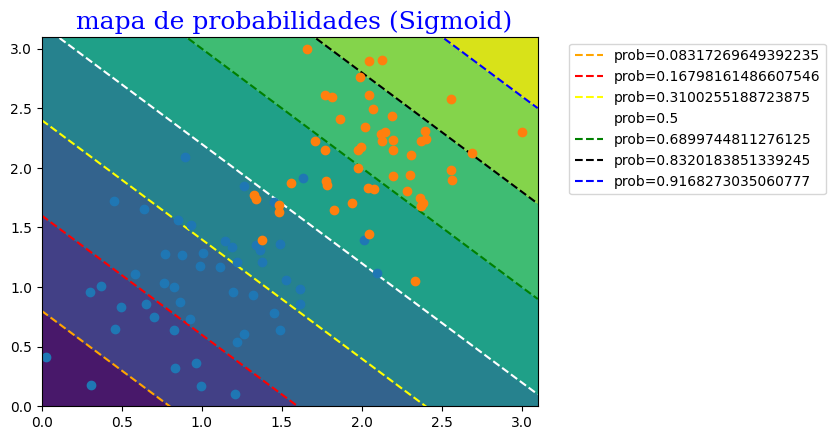

In [ ]:



def f(x,cont):             # fucnion necesaria para obtener las rectas 
  return -x +cont          # recta clasificadora inicial y=-x+desplazamiento
 


x=np.arange(0,3.2,0.1)   


def sigmoid(x1):  
    sig = 1 / (1 + math.exp(-x1))     # función sigmoide
    return sig


desplazamiento=-0.8  # desplazamiento de las rectas 

desplazamiento2=-4   # desplazameinto del valor de entrada de ka fucnion sigmoide 


c=[]  # vector para almacenar sigmoide(x)




for i in range(8):         # ciclo necesario para diferenciar las rectas con su respectivo desplazamiennto 
   
   desplazamiento=desplazamiento+0.8
   desplazamiento2=desplazamiento2+0.8
   c=sigmoid(desplazamiento2)
   
   salida=f(x,desplazamiento)



   if i==1:
     plt.plot(x,salida,linestyle='dashed',color='orange',label="prob="+str(c))
   if i==2:
     plt.plot(x,salida,linestyle='dashed',color='red',label="prob="+str(c))
   if i==3:
     plt.plot(x,salida,linestyle='dashed',color='yellow',label="prob="+str(c))
   if i==4:
     plt.plot(x,salida,linestyle='dashed',color='white',label="prob="+str(c))
   if i==5:
     plt.plot(x,salida,linestyle='dashed',color='green',label="prob="+str(c))
   if i==6:
     plt.plot(x,salida,linestyle='dashed',color='black',label="prob="+str(c))
   if i==7:
     plt.plot(x,salida,linestyle='dashed',color='blue',label="prob="+str(c))
   








cp = plt.contourf(X, Y, Z)                            # se grafica el plano con sus respectivas rectas frontera 



font1 = {'family':'serif','color':'blue','size':18}

plt.title(" mapa de probabilidades (Sigmoid)",fontdict=font1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.plot(col,col2,'o')
plt.plot(col3,col4,'o')
plt.xlim(0,3.1)
plt.ylim(0,3.1)



plt.show()



**Función_Soft_Max**


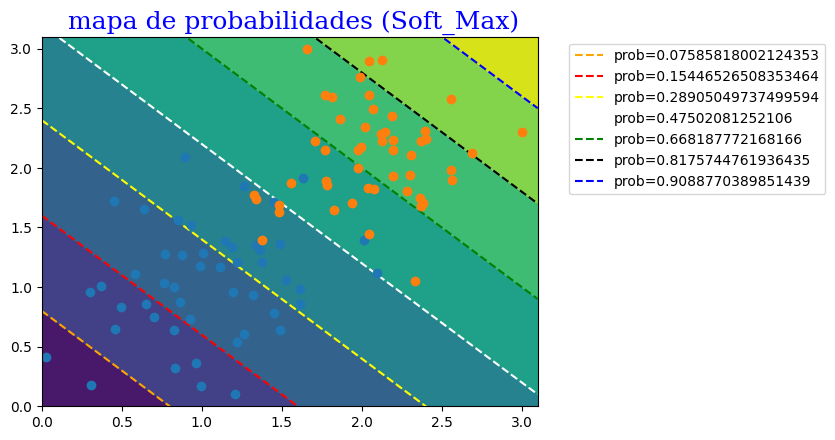

In [ ]:

def softmax(x,y):
  softx=(math.exp(x))/(math.exp(x)+math.exp(y))     # función soft_max
    
  return softx


cont=-0.8

cont2=-4
c=[]                                  # vector para alamacenar softmax(x,y)



for i in range(8):
   
   cont=cont+0.8  
   cont2=cont2+0.8
   sigm=softmax(cont2-0.05,0.05)      # se le realiza un pequeño desfase a la funcion para que no se repitan los valores es decir sigmoide(x)!=softmax(x,y)
   c=sigm
   salida=f(x,cont)                   # obtencion de la fucnion de las rectas 


   if i==1:
     plt.plot(x,salida,linestyle='dashed',color='orange',label="prob="+str(c))     # se grafica x , y , con str transformamos la variable int to string 
   if i==2:
     plt.plot(x,salida,linestyle='dashed',color='red',label="prob="+str(c))
   if i==3:
     plt.plot(x,salida,linestyle='dashed',color='yellow',label="prob="+str(c))
   if i==4:
     plt.plot(x,salida,linestyle='dashed',color='white',label="prob="+str(c))
   if i==5:
     plt.plot(x,salida,linestyle='dashed',color='green',label="prob="+str(c))
   if i==6:
     plt.plot(x,salida,linestyle='dashed',color='black',label="prob="+str(c))
   if i==7:
     plt.plot(x,salida,linestyle='dashed',color='blue',label="prob="+str(c))



font1 = {'family':'serif','color':'blue','size':18}

plt.title(" mapa de probabilidades (Soft_Max)",fontdict=font1)
cp = plt.contourf(X, Y, Z)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.plot(col,col2,'o')
plt.plot(col3,col4,'o')
plt.xlim(0,3.1)
plt.ylim(0,3.1)

plt.show()